## Jupyter Notebook 1: Mobility analysis.

The mobility data analyzed with-in this project were obtained from https://www.google.com/covid19/mobility/index.html?hl=en. The data offered by Google represent the changes in mobility trends over time and by geography zone. This information is organized in different categories according to were the *subject* was moving, like places such as retail and recreation, groceries and pharmacies, parks, transit stations and workplaces.

The categories are classified as shown below:

    1.Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.
    2.Parks: Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.
    3.Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.
    4.Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.
    5.Workplaces: Mobility trends for places of work.

"These Community Mobility Reports aim to provide insights into what has changed in response to policies aimed at combating COVID-19." -- GoogleMaps -- 

In [1]:
#Import the required external libraries
import pandas as pd
from pandas import Grouper 
import numpy as np

#Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [2]:
#Import EDA functions defined in EDA.py
import EDA

In [3]:
#Import of dataset to visualize its characteristics
mobility_data = EDA.file_to_df(file_ = "Global_Mobility_Report.csv")

In [5]:
#We eliminate de unnecesary data for our global-dataset 
mod_mobility_data = mobility_data.drop(["sub_region_1", "sub_region_2", "country_region_code", "residential_percent_change_from_baseline"], axis = 1)
mod_mobility_data.rename(columns = {"country_region":"country", "retail_and_recreation_percent_change_from_baseline":"recreation", "grocery_and_pharmacy_percent_change_from_baseline":"grocery_pharma", "parks_percent_change_from_baseline":"parks", "transit_stations_percent_change_from_baseline":"public_transport", "workplaces_percent_change_from_baseline":"workplace"}, inplace = True)

#We convert the date column into as datetime type
mod_mobility_data["date"] = mod_mobility_data["date"].astype("datetime64")
mod_mobility_data.head(3)

,country,date,recreation,grocery_pharma,parks,public_transport,workplace
0,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0
1,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0
2,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0


In [6]:
#Generation of the DFs for each european country
start_date = "20-2-17" #making DFs comparable
spain = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "Spain", condition_2 = start_date)
germany = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "Germany", condition_2 = start_date)
portugal = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "Portugal", condition_2 = start_date)
france = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "France", condition_2 = start_date)
italy = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "Italy", condition_2 = start_date)
uk = EDA.country_google_generator(df = mod_mobility_data, condition_1 = "United Kingdom", condition_2 = start_date)

In [15]:
#Generation of the DFs for each country grouped in weekly periods
spain_weekly = EDA.df_weekly_generation(df = spain)
germany_weekly = EDA.df_weekly_generation(df = germany)
portugal_weekly = EDA.df_weekly_generation(df = portugal)
france_weekly = EDA.df_weekly_generation(df = france)
italy_weekly = EDA.df_weekly_generation(df = italy)
uk_weekly = EDA.df_weekly_generation(df = uk)

In [16]:
spain

,date,recreation,grocery_pharma,parks,public_transport,workplace
0,2020-02-15,2.0,-1.0,26.0,8.0,0.0
1,2020-02-16,2.0,3.0,13.0,5.0,-1.0
2,2020-02-17,0.0,1.0,9.0,3.0,3.0
3,2020-02-18,-2.0,0.0,5.0,4.0,3.0
4,2020-02-19,0.0,1.0,11.0,2.0,3.0
...,...,...,...,...,...,...
2015,2020-05-21,-51.0,-20.0,-9.0,-50.0,-44.0
2016,2020-05-22,-53.0,-18.0,-14.0,-51.0,-42.0
2017,2020-05-23,-59.0,-23.0,-12.0,-49.0,-27.0
2018,2020-05-24,-62.0,-43.0,-33.0,-55.0,-24.0


In [12]:
spain_weekly

,recreation,grocery_pharma,parks,public_transport,workplace
week,,,,,
0,0.157143,0.307143,13.371429,3.664062,1.971429
1,2.135714,2.285714,25.450000,6.312500,-2.807143
2,-1.035714,1.721429,2.278571,1.218750,1.250000
3,-7.121429,12.564286,8.407143,-5.359375,-1.628571
4,-81.692857,-38.214286,-69.657143,-70.450382,-53.228571
5,-87.900000,-54.357143,-79.950000,-81.627907,-63.800000
6,-91.078571,-57.092857,-82.078571,-83.679389,-69.571429
7,-91.128571,-59.821429,-82.414286,-84.786260,-74.028571
8,-89.507143,-50.811594,-78.914286,-81.206107,-65.714286


In [7]:
countries = ["spain", "portugal", "france", "italy", "germany", "uk"]
dataframes = [spain_weekly, portugal_weekly, france_weekly, italy_weekly, germany_weekly, uk_weekly]

In [8]:
#Generation of the DFs for each category
parks = EDA.category_df_generator(countries, dataframes, category = "parks")
recreation = EDA.category_df_generator(countries, dataframes, category = "recreation")
workplace = EDA.category_df_generator(countries, dataframes, category= "workplace")
grocery_pharma = EDA.category_df_generator(countries, dataframes, category = "grocery_pharma")
public_transport = EDA.category_df_generator(countries, dataframes, category = "public_transport")

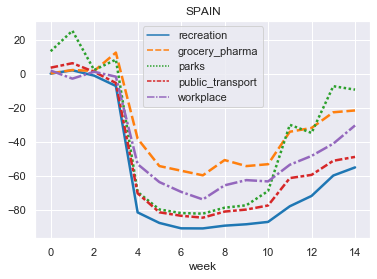

In [9]:
EDA.line_plot(df = spain_weekly, title = "spain")

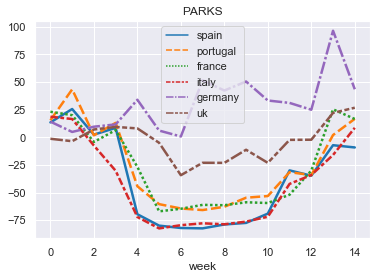

In [10]:
EDA.line_plot(df = parks, title = "parks")